[img_ddpg_version_1]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_1.png "Score of Version 1"

[img_ddpg_version_2]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_2.png "Score of Version 2"

[img_ddpg_version_3]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_3.png "Score of Version 3"

[img_ddpg_version_4]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_4.png "Score of Version 4"

[img_ddpg_version_5]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_5.png "Score of Version 5"

[img_ddpg_version_6]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_6.png "Score of Version 6"

[img_ddpg_version_7]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_7.png "Score of Version 7"


[img_ddpg_version_6_and_version_7]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_6_to_version_7.png "Comparison between Version 6 and Version 7"

[img_ddpg_version_6_and_version_7_with_raw_data]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_6_to_version_7_with_raw_data.png "Comparison between Version 6 and Version 7 (with raw data)"

[img_ddpg_version_1_to_verion_5]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_1_to_version_5.png "Comparison among version 1 to version 5"

[img_ddpg_version_1_to_verion_7]: https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/blob/master/p3_collab-compet/DDPG/pictures/ddpg_version_1_to_version_7.png "Comparison among version 1 to version 7"


# Abstract

In this work, [DDPG](https://arxiv.org/abs/1509.02971) algorithm is adopted to solve tennis game which is similar to [Unity's version](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#tennis). Multiple methods are applied including [PER (Prioritized Experience Replay)](https://arxiv.org/abs/1511.05952) and batch normalization. The highest score is 5.1.  


# Introduction
The goal of this project is to play tennis game with 2 different agents. When an agent hit the ball, it receives +0.1 reward. If not, it gets -0.01 punishment. The state size is 24 and action size is 2. Both of them are continous. This work implements 2 seperate DDPG agents, and each agent has its own PER buffer. They are trained seperately as well. The actor and critic have 2-layer fully-connected neural networks.


# Approaches
7 versions are implemeted in this work.

### Version 1
This vanilla DDPG implementation lacks exploration decay and PER. The update period is 20. In each update period, the program randomly picks up 10 different samples. The gradient clipping of critic is 0.5. The noise is [Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process).

Parameters:
* Learning rate for critic and actor are both 1e-3
* Ator has 3 fully-connected neural networks with 1st layer size=128, 2nd layer size=128
* Critic has 3-layer neural networks. 1st layer size=128 and 2nd layer size=128. The input 2nd layer is concatenated with action space.
* Buffer size = 1e6
* Gradient clipping of critic = 0.5
* Batch size = 50
* Ornstein–Uhlenbeck nosie (OUNoise)
  * mu = 0.0
  * sigma = 0.2
  * theta = 0.15

![Score of Version 1][img_ddpg_version_1]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


### Version 2
By observing the action value in the early stage of training, most of them range from (-0.5, 0.5) which might limits the exploration. As a result, the sigma of OUNoise is changed from 0.2 to 0.8

Parameters:
* Ornstein–Uhlenbeck nosie (OUNoise)
  * mu = 0.0
  * sigma = 0.8
  * theta = 0.15
  
![Score of Version 2][img_ddpg_version_2]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


### Version 3
Because most of reward in version 2 is around 0.09, which implies that agents don't have sufficient **'succussful'** experience. As a result, [prioritized experience replay (PER)](https://arxiv.org/abs/1511.05952) is added in this version. The score is then gradually going up compared to version 2.

Parameters:
* PER
    * alpha = 0.6
    * beta0 = 0.4
    

![Score of Version 3][img_ddpg_version_3]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


### Version 4
Owning to the impression in [project 2](https://github.com/Brandon-HY-Lin/deep-reinforcement-learning/tree/master/p2_continuous-control), I thought batch normalization could boost the training speed. Hence, batch normalization is added in this version. However, the result is worse than version 3.


![Score of Version 4][img_ddpg_version_4]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


### Version 5
Although version 4 is a failure, I don't roll back the batch normalization. I add decay mechanism in noise.

Parameters:
* weight decay
    * epsilon_start = 1.0
    * epsilon_end = 0.1 (mininum weight decay)
    * epsilon_decay = 0.999 (decay rate of each time step)


![Score of Version 5][img_ddpg_version_5]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


### Version 6
In order to speed up the training, the sampling number is increased from 10 to 20. The units of each layer in neural networks is increased from 64 to 128. The batch size is increased from 50 to 128. The starting value of Weight decay is changed from 1.0 to 5.0. The result is significant, the highest score is 5.1. The average score passes 0.5 at episode 397.

Parameters:
* Sampling number = 20
* Units of layers
    * 1st layer = 128
    * 2nd layer = 128
* Batch size = 128
* Weight decayf
    * epsilon_start = 5.0
    * epsilon_end = 0.0
    * epssilon_decay = 0.99
    
    
![Score of Version 6][img_ddpg_version_6]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.

    
### Version 7
Recall that batch normalization is not rolled back between version 4 and version 6. In order to clarify the impact of batch normalization, batch normalization is removed in this version. The highest score is 5.2 and average score passes 0.5 at episode 448.


![Score of Version 7][img_ddpg_version_7]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100. 



# Results
In section Approach, 7 versions are proposed. The result of 7 versions is listed below, to be concise, the raw data are removed. Due to the training time, there are only 1,000 episodes in version 6 and 7.

![Scores of all versions][img_ddpg_version_1_to_verion_7]


A close look between version 1 and version 5 is listed below. Note that version 4 and version 5 are inferior to version 3 because of batch normalization.

![Scores of first 5 versions][img_ddpg_version_1_to_verion_5]


To take a deep look at the impact of batch normalization, I plot the scores of version 6 and verion 7 below. Both versions achieve socres above 5.0, but version 6 (w/ BN) has higher average score around 810 episode.

![Scores of version 6 and version 7][img_ddpg_version_6_and_version_7_with_raw_data]

The translucent line shows the raw score of every episode. The solid line shows the average score with window=100.


# Conclusion
In this work, two high performance DDPG approaches are implement, i.e. version 6 and version 7. They all utilize PER to boost the training speed and can achieve high socre of +5.0. Furthermore, by applying batch normalization can get higher average score.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


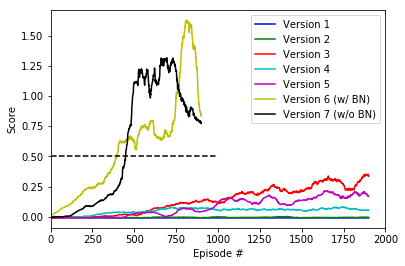

In [2]:
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [ScoreParcels('Version 1', './logs/log_DDPG_version_1.pickle', 'b'),
                ScoreParcels('Version 2', './logs/log_DDPG_version_2.pickle', 'g'),
                ScoreParcels('Version 3', './logs/log_DDPG_version_3.pickle', 'r'),
                ScoreParcels('Version 4', './logs/log_DDPG_version_4.pickle', 'c'),
                ScoreParcels('Version 5', './logs/log_DDPG_version_5.pickle', 'm'),
                ScoreParcels('Version 6 (w/ BN)', './logs/log_DDPG_version_6.pickle', 'y'),
                ScoreParcels('Version 7 (w/o BN)', './logs/log_DDPG_version_7.pickle', 'k'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=100,
                 max_len=2000,
                 show_origin=False,
                    margin=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


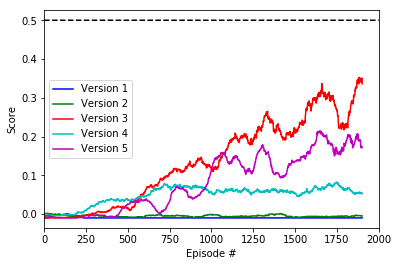

In [3]:
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [ScoreParcels('Version 1', './logs/log_DDPG_version_1.pickle', 'b'),
                ScoreParcels('Version 2', './logs/log_DDPG_version_2.pickle', 'g'),
                ScoreParcels('Version 3', './logs/log_DDPG_version_3.pickle', 'r'),
                ScoreParcels('Version 4', './logs/log_DDPG_version_4.pickle', 'c'),
                ScoreParcels('Version 5', './logs/log_DDPG_version_5.pickle', 'm'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=100,
                 max_len=2000,
                 show_origin=False,
                    margin=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


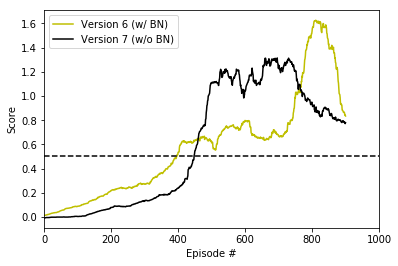

In [7]:
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [
                ScoreParcels('Version 6 (w/ BN)', './logs/log_DDPG_version_6.pickle', 'y'),
                ScoreParcels('Version 7 (w/o BN)', './logs/log_DDPG_version_7.pickle', 'k'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=100,
                 max_len=1000,
                 show_origin=False,
                    margin=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


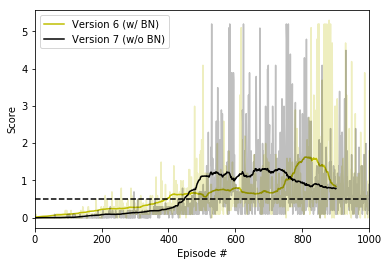

In [8]:
import numpy as np
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from utils import utils
from utils.utils import ScoreParcels

score_parcels = [
                ScoreParcels('Version 6 (w/ BN)', './logs/log_DDPG_version_6.pickle', 'y'),
                ScoreParcels('Version 7 (w/o BN)', './logs/log_DDPG_version_7.pickle', 'k'),]

utils.plot_scores_v2(score_parcels, 
                  size_window=100,
                 max_len=1000,
                 show_origin=True,
                    margin=0)